In [8]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [2]:
def save_pkl(data, filename, local=False):
    """ Save data to file """
    # create path
    parent_dir = os.path.dirname(filename)
    if not os.path.exists(parent_dir):
        os.makedirs(parent_dir)

    # save file
    output = open(filename, 'wb')
    pickle.dump(data, output, pickle.HIGHEST_PROTOCOL)
    output.close()


def load_pkl(filename, local=False):
    """ Load data to pickle """
    input = open(filename, 'rb')
    data = pickle.load(input)
    input.close()
    return data

In [3]:
# Data file
raw_data_path = '../../data/raw data/text8'
context_to_dict_path = '../../data/text8_ng/dict/cont_to_int.dict'
output_path = '../../data/text8_ng/contexts/distribution_from_raw.pkl'

In [4]:
# Load data
with open(raw_data_path, encoding='utf-8') as f:
    words = f.read().split()
    
# Load dict
context_to_dict = load_pkl(context_to_dict_path, local=True)

# Convert vocab to int
context = []
for word in words:
    if word in context_to_dict:
        context.append(context_to_dict[word])

In [11]:
context_counts = Counter(context)
n_context = len(context_to_dict)
n_data = sum(list(context_counts.values()))

context_distribution = np.zeros(n_context)
for c, count in context_counts.items():
    context_distribution[c] = count / n_data
    
context_distribution = np.array(context_distribution)

In [17]:
int_to_cont = load_pkl('../../data/text8_ng/dict/int_to_cont.dict', local=True)

In [6]:
save_pkl(context_distribution, output_path)

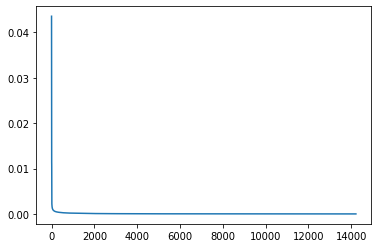

In [9]:
sorted(context_distribution)
plt.plot(context_distribution)
plt.show()

In [10]:
context_distribution[:100]

array([0.04358111, 0.02804496, 0.02650552, 0.02038944, 0.01326017,
       0.01225511, 0.01214779, 0.01144998, 0.01081103, 0.01055045,
       0.00469485, 0.00304925, 0.00255032, 0.00251582, 0.00240648,
       0.00216729, 0.00216041, 0.00203276, 0.00202313, 0.00189972,
       0.00183918, 0.00167873, 0.00158072, 0.00157871, 0.00155542,
       0.00154833, 0.00153405, 0.00152801, 0.00149774, 0.00148292,
       0.00141614, 0.00140725, 0.00137454, 0.00136576, 0.00133602,
       0.00129919, 0.00125611, 0.00123843, 0.00122108, 0.00120647,
       0.00119843, 0.00116117, 0.00113154, 0.00112476, 0.00111894,
       0.00111661, 0.00107904, 0.0010766 , 0.00106856, 0.00106433,
       0.00104337, 0.00104295, 0.00101956, 0.00101511, 0.00100961,
       0.00100908, 0.00099617, 0.00099363, 0.00099225, 0.00098283,
       0.00097034, 0.00096664, 0.0009479 , 0.0009424 , 0.00093372,
       0.00092462, 0.00091647, 0.00088239, 0.00087974, 0.0008789 ,
       0.00087255, 0.00085836, 0.00084693, 0.00084534, 0.00083